1.

The data includes the ratings of different coffee brands across the world by professional judges. The coffee is scored base on many tasting components such as as sweetness, acidity, and aftertaste. Each different coffee has information on the type, origin, growing location, processing method, and owner

In [ ]:
#2.
from datascience import *
import pandas as pd


# Import numpy also
import numpy as np

from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use("fivethirtyeight")

import matplotlib.pyplot as plt

%pip install -qq ipytest

import ipytest

ipytest.autoconfig()

3.

columns with missing values:
- farm_name
- company
- region

Inconsistent columns (example):
- bag_weight

69 kg

6

5lbs

4. Questions


Question #1: How do the different processing methods impact coffee acidity, body, and flavor? How do they compare to each other?

Question #2: Which region has the highest and lowest flavor ranking and how do they compare to eachother?

Question #3: Do companies use one processing method or multiple? Does this processing method impact the moisture level of the coffee?

In [ ]:
URL = "https://docs.google.com/spreadsheets/d/1zjVYl_8aBaZpxTomEdKhfagUmA4Cwv9dB36a1sCDs5o/export?format=csv"
original_data = Table.read_table(URL)

In [ ]:
data = original_data.drop(5, 6, 7, 9, 11, 14, 15, 16, 17, 18, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42)
data

total_cup_points,species,owner,country_of_origin,farm_name,company,region,number_of_bags,bag_weight,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture
90.58,Arabica,metad plc,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,300,60 kg,Washed / Wet,8.67,8.83,8.67,8.75,8.5,8.42,10,10,10,8.75,0.12
89.92,Arabica,metad plc,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,300,60 kg,Washed / Wet,8.75,8.67,8.5,8.58,8.42,8.42,10,10,10,8.58,0.12
89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",nan,nan,5,1,nan,8.42,8.5,8.42,8.42,8.33,8.42,10,10,10,9.25,0
89,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,yidnekachew debessa coffee plantation,oromia,320,60 kg,Natural / Dry,8.17,8.58,8.42,8.42,8.5,8.25,10,10,10,8.67,0.11
88.83,Arabica,metad plc,Ethiopia,metad plc,metad agricultural developmet plc,guji-hambela,300,60 kg,Washed / Wet,8.25,8.5,8.25,8.5,8.42,8.33,10,10,10,8.58,0.12
88.83,Arabica,ji-ae ahn,Brazil,nan,nan,nan,100,30 kg,Natural / Dry,8.58,8.42,8.42,8.5,8.25,8.33,10,10,10,8.33,0.11
88.75,Arabica,hugo valdivia,Peru,nan,richmond investment-coffee department,nan,100,69 kg,Washed / Wet,8.42,8.5,8.33,8.5,8.25,8.25,10,10,10,8.5,0.11
88.67,Arabica,ethiopia commodity exchange,Ethiopia,aolme,nan,oromia,300,60 kg,nan,8.25,8.33,8.5,8.42,8.33,8.5,10,10,9.33,9,0.03
88.42,Arabica,ethiopia commodity exchange,Ethiopia,aolme,nan,oromiya,300,60 kg,nan,8.67,8.67,8.58,8.42,8.33,8.42,9.33,10,9.33,8.67,0.03
88.25,Arabica,diamond enterprise plc,Ethiopia,tulla coffee farm,diamond enterprise plc,"snnp/kaffa zone,gimbowereda",50,60 kg,Natural / Dry,8.08,8.58,8.5,8.5,7.67,8.42,10,10,10,8.5,0.1


In [ ]:
#change Nan to NA
def change_to_NA(word: str) -> str:
  """Return NA if there is a blank"""
  if word == "nan":
    return "NA"
  return word

#Apply "Change to NA" to columns
def apply_NA(col: str) -> Table:
  """Apply 'Change_to_NA' to columns in data"""
  return data.apply(change_to_NA, col)

data["farm_name"] = apply_NA("farm_name")
data["region"] = apply_NA( "region")
data["company"] = apply_NA("company")
data["processing_method"] = apply_NA("processing_method")
NA_table = data
NA_table

^^^
These functions take a column and change a blank cell to NA. The columns used are 'farm name' 'region' 'company' and 'processing methods'

In [ ]:
%%ipytest

#Change lbs to kg
def lbs_to_kg(weight: str) -> str:
  """changes lbs to kg"""
  if "lbs" in weight:
    weight_number = weight.split(" ")
    new_weight =  str(int(weight_number[0]) * .453)
    return new_weight[:5]
  else:
    return weight

def test_lbs_to_kg():
  assert lbs_to_kg("34 lbs") == "15.40"
  assert lbs_to_kg("1") == "1"
  assert lbs_to_kg("12 lbs") == "5.436"

.                                                                                            [100%]
1 passed in 0.03s


^^^
This function changes any lbs to kg

In [ ]:
NA_table["bag_weight"] = NA_table.apply(lbs_to_kg, "bag_weight")
table_with_kg = NA_table
table_with_kg

^^^
Apply lbs_to_kg to 'bag_weight' column

In [ ]:
%%ipytest

def remove_kg(weight: str) -> str:
  """Removes 'kg' to the measurents"""
  if "kg" in weight:
    weight_split = weight.split(" ")
    return weight_split[0]
  else:
    return weight

def test_remove_kg():
  assert remove_kg('4 kg') == "4"
  assert remove_kg('34 kg') == "34"
  assert remove_kg('4') == "4"

table_with_kg["bag_weight"] = table_with_kg.apply(remove_kg, "bag_weight")
clean_table = table_with_kg
clean_table = clean_table.relabeled("bag_weight", "bag_weight(kg)")
clean_table

.                                                                                            [100%]
1 passed in 0.03s


^^^
Function 'remove_kg' removes 'kg' from a string which is applied to 'bag_weight' column. Column is relabeled to 'bag_weight(kg)'

In [ ]:
#For Question 1
#Seperate the table by the type of processing method
def seperate_processing_method(method: str) -> Table:
  """filters the table with the given processing method"""
  return clean_table.where("processing_method", lambda x: x == method)

washed_wet_table = seperate_processing_method("Washed / Wet")
natural_dry_table = seperate_processing_method("Natural / Dry")
pulp_table = seperate_processing_method("Pulped natural / honey")
semi_table = seperate_processing_method("Semi-washed / Semi-pulped")
NA_table = seperate_processing_method("NA")
other_table = seperate_processing_method("Other")

In [ ]:
%%ipytest

def column_mean(table: Table, column_name: str) -> float:
  """Takes the mean of a column from a table"""
  total = 0
  for n in table[column_name]:
    total = total + n
  return total / table.num_rows

def test_column_mean():
  assert column_mean(clean_table, "moisture") == 0.088379387602688486
  assert column_mean(clean_table, "aroma") == 7.56670649738611
  assert column_mean(clean_table, "total_cup_points") == 82.089850634801991

def list_of_averages(column: str) -> int:
  """Takes the averages of a column for each type of processing method"""
  return [column_mean(natural_dry_table, column),
  column_mean(pulp_table, column),
  column_mean(semi_table, column),
  column_mean(washed_wet_table, column)]

.                                                                                            [100%]
1 passed in 0.02s


In [ ]:
list_acid_av = list_of_averages("acidity")
list_flavor_av = list_of_averages("flavor")
list_body_av = list_of_averages("body")

^^^
Stores the average for each processing method for acidity, flavor, and body

In [ ]:
#Makes a list of the different processing methods
processing_list = list(clean_table.group("processing_method")["processing_method"])
processing_list.remove("NA")
processing_list.remove("Other")
processing_list

#Build table
average_acidity_flavor = Table().with_columns("method", processing_list, "average acidity", list_acid_av, "average flavor", list_flavor_av, "average body", list_body_av)
average_acidity_flavor.sort("average flavor", descending=True)

plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=12)

average_acidity_flavor.show()
average_acidity_flavor.scatter("method", ["average flavor", "average acidity", "average body"])

Question #1: How do the different processing methods impact coffee acidity, body, and flavor? How do they compare to each other?

None of the methods affect acidity since the results show a consistent score of between 7.52 and 7.55

Natural/Dry affects body and flavor in a similar way since both have a similar number of around 7.59.

Pupled natural/honey has a lower flavor score than natural/dry and semi-washed/pulped, but a very high score in body of about 7.63.

semiwahed/semipulped affects aciditiy the same way as body but has the highest flavor ranking of about 7.59.

Washed/wet has the lowest body and flavor ranking of about 7.48

In [ ]:
#For question #2
clean_table.group("region").sort("count", descending=True)

region,count
huila,112
oriente,80
south of minas,68
kona,66
NA,59
veracruz,35
tarrazu,19
comayagua,17
huehuetenango,16
san marcos,16


In [ ]:
def flavor_of_region(region: str) -> Table:
  """Filters the table with the given region and sorts the highest flavor scores"""
  return clean_table.where("region", lambda x: x == region).sort("flavor", descending= True)

def list_top_50(table: Table):
  """Makes a list of the top 50 highest flavor ratings of a region"""
  return list(table.column("flavor"))[:50]

huila_top = list_top_50(flavor_of_region("huila"))
oriente_top = list_top_50(flavor_of_region("oriente"))
south_top = list_top_50(flavor_of_region("south of minas"))

ratings = [huila_top, oriente_top, south_top]

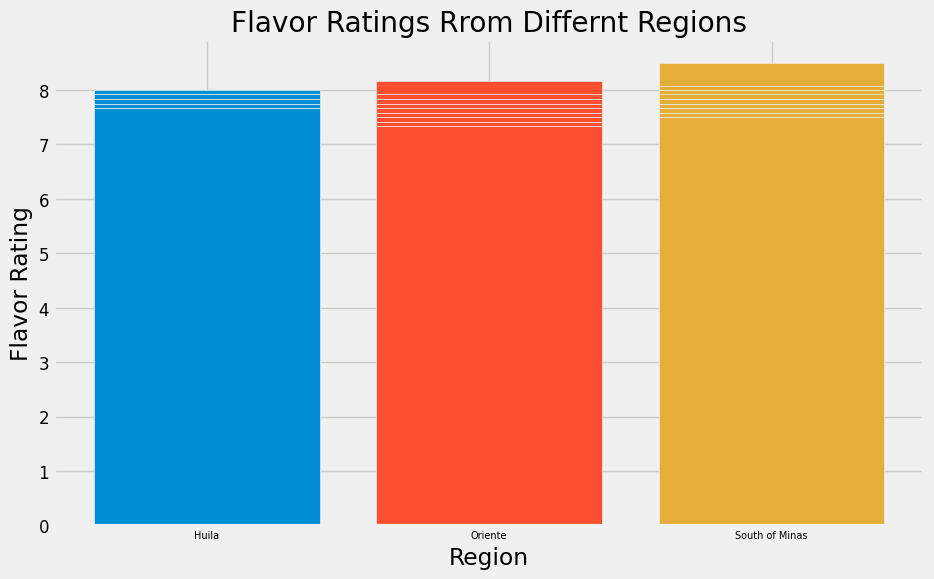

In [ ]:
region_names = ['Huila', 'Oriente', 'South of Minas']
# Creating the scatter plot
plt.figure(figsize=(10, 6))
for i, flavor in enumerate(region_names):
    plt.bar([flavor] * len(ratings[i]), ratings[i], label=flavor)

plt.title('Flavor Ratings Rrom Differnt Regions')
plt.xlabel('Region')
plt.ylabel('Flavor Rating')
plt.show()

Question #2: Which region has the highest and lowest flavor ranking and how do they compare to eachother?

South of Minas has the highest flavor rating coffees of over 8. Oriente also has coffee with scores over 8, but also has very low scores of around 7.3. Even though Huila does not exceed a score of 8, their coffee score averages are higher than Oriente and South of Minas.

In [ ]:
#For question 3
company_counts = clean_table.group("company").sort("count", descending=True)
company_counts

company,count
NA,209
"unex guatemala, s.a.",86
ipanema coffees,50
exportadora de cafe condor s.a,40
kona pacific farmers cooperative,40
racafe & cia s.c.a,40
blossom valley宸嶧國際,25
carcafe ltda,25
nucoffee,24
taiwan coffee laboratory,20


In [ ]:
chosen_companies = company_counts.where("count", lambda x: x == 40)
chosen_companies_names = list(chosen_companies["company"])
chosen_companies

company,count
exportadora de cafe condor s.a,40
kona pacific farmers cooperative,40
racafe & cia s.c.a,40


In [ ]:
%%ipytest

def average_moisture(company: str) -> int:
  """Filters the table for the given company and returns the average moisture ratings"""
  company_table = clean_table.where("company", lambda x: x == company)
  return sum(list(company_table["moisture"])) / company_table.num_rows

def test_average_moisture():
  assert average_moisture("racafe & cia s.c.a") == 0.042500000000000017
  assert average_moisture("carcafe ltda") == 0.053600000000000009
  assert average_moisture("taiwan coffee laboratory") == 0.064999999999999988

.                                                                                            [100%]
1 passed in 0.02s


In [ ]:
company_averages = list(map(lambda x: average_moisture(x), chosen_companies["company"]))

In [ ]:
def company_method(company: str) -> Table:
  """Takes a company and groups the type of processing method they use for the coffee"""
  company_table = clean_table.where("company", lambda x: x == company)
  return company_table.group("processing_method")

In [ ]:
(company_method("exportadora de cafe condor s.a"))

processing_method,count
Natural / Dry,3
Washed / Wet,37


In [ ]:
company_method("kona pacific farmers cooperative")

processing_method,count
Natural / Dry,40


In [ ]:
company_method("racafe & cia s.c.a")

processing_method,count
NA,4
Washed / Wet,36


In [ ]:
company_method_list = ["Washed / Wet", "Natural / Dry", "Washed / Wet"]

In [ ]:
Table().with_columns("company", chosen_companies_names, "company averages", company_averages, "processing method", company_method_list)

company,company averages,processing method
exportadora de cafe condor s.a,0.061,Washed / Wet
kona pacific farmers cooperative,0.075,Natural / Dry
racafe & cia s.c.a,0.0425,Washed / Wet


Question #3: Do companies use one processing method or multiple? Does this processing method impact the moisture level of the coffee?

The processing method does impact the moisture level. To use efficient data, I took the average moisture from the 3 companies that have exactly 40 coffee types in the table. The moisture level was the lowest by 'racafe & cia s.c.a' of 0.0424 using the washed/wet method. 'Kona pacific farmers cooperative' had the highest score of 0.075 and they used natural/dry method. Therefore, natural/dry method results in a higher score, while washed/wet method is lower.

References

“Coffee_quality_rating_predictor/Data/Raw/Coffee_ratings.csv at Main · UBC-MDS/Coffee_quality_rating_predictor.” GitHub, github.com/UBC-MDS/Coffee_quality_rating_predictor/blob/main/data/raw/coffee_ratings.csv. Accessed 22 Nov. 2023.